In [13]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_random_forest_reg(X_columns, y_columns, data)
    set_knn_reg(X

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [14]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
6729,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
6730,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


In [15]:
req_data = ['date','fighter','opponent','result']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2022-09-03,Ciryl Gane,Tai Tuivasa,win,0.011068,3.066630,0.011143,0.001133,0.352446,0.742640,0.109127,0.472971,0.616310,0.736959,-1.231975,1.443028,-1.616731,0.399163,-2.834057,1.067086
1,2022-09-03,Robert Whittaker,Marvin Vettori,win,0.011068,1.560845,0.405905,0.001133,-0.589742,-0.236546,0.343675,-0.575761,0.167167,-0.154920,-0.212298,0.181367,-1.616731,0.143619,-0.545253,1.067086
2,2022-09-03,Joaquin Buckley,Nassourdine Imavov,lose,0.011068,-0.170807,-0.778380,-1.693534,0.229794,0.253047,-0.326462,-2.291867,-0.307279,-1.776519,0.587569,-0.659740,0.985268,-0.086371,0.599149,-0.010244


### <span style='color:green'> **[done]** </span>Feature's significanse:

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.19, 0.42, 0.26, 0.31, 0.28, 0.57, 0.18, 0.19, 0.39]
Most significant: ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'td def._dif', 'sub. avg._dif', 'td acc._dif', 'td avg._dif', 'td def._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.05,0.04,0.0,0.0
sapm_dif,0.05,0.31,0.01,0.13
slpm_dif,0.17,0.42,0.03,0.04
stance_win_ratio,0.05,0.02,0.0,0.01
str. acc._dif,0.11,0.26,0.04,0.07
str. def_dif,0.09,0.28,0.06,0.11
sub. avg._dif,0.07,0.04,0.39,0.04
td acc._dif,0.05,0.15,0.01,0.18
td avg._dif,0.08,0.09,0.04,0.57


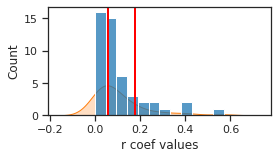

In [16]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in X:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

## <span style='color:orange'> **[in-progress]** </span> KNN regression model training:

In [17]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 21), train_set=(3352, 12), validation_set=(1390, 12), test_set=(1989, 12)


,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
6729,validation,2017-07-29,Jarred Brooks,Eric Shelton,win,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


In [21]:
rf_reg = set_random_forest_reg(X_columns=X, y_columns=y, data=df)
df = set_predictions(model=rf_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,0.139557,0.139557,0.139557,0.139557
6729,validation,2017-07-29,Jarred Brooks,Eric Shelton,win,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,-0.047500,-0.047500,-0.047500,-0.047500
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,0.369625,0.369625,0.369625,0.369625


In [31]:
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='test']
    pred = df[column+'_pred'][df.set=='test'] 
    print(column + ' RMSE: ' + str(get_rmse(act=act, pred=pred)))

kd_dif RMSE: 0.0791
str_dif RMSE: 0.0593
td_dif RMSE: 0.1098
sub_dif RMSE: 0.0813


#### <span style='color:green'> **[done]** </span> splitting data:

In [5]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 21), train_set=(3280, 12), validation_set=(1383, 12), test_set=(2068, 12)


,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,train,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,win,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903


#### <span style='color:green'> **[done]** </span> KNN reg Parameter Tunning:

In [6]:
knn_grad = pd.DataFrame(columns=['neighbors','kd_dif rmse','str_dif rmse','td_dif rmse','sub_dif rmse','total_rmse'])

for n in tqdm(np.arange(1,30,2)):
    knn_grad = pd.concat([knn_grad,get_grad_descent_step(alpha=0.01, X_columns=X, y_columns=y, data=df, n=n)], ignore_index=True)

knn_grad

100%|██████████| 15/15 [00:17<00:00,  1.15s/it]


,neighbors,kd_dif rmse,str_dif rmse,td_dif rmse,sub_dif rmse,total_rmse
0,1,0.1446,0.1359,0.1402,0.1062,0.5269
1,3,0.1179,0.1099,0.1214,0.0878,0.4370
2,5,0.1127,0.1030,0.1157,0.0837,0.4151
3,7,0.1089,0.0995,0.1129,0.0819,0.4032
4,9,0.1077,0.0978,0.1110,0.0802,0.3967
5,11,0.1067,0.0966,0.1099,0.0792,0.3924
6,13,0.1062,0.0963,0.1094,0.0784,0.3903
7,15,0.1055,0.0958,0.1089,0.0779,0.3881
8,17,0.1056,0.0953,0.1086,0.0777,0.3872
9,19,0.1055,0.0947,0.1080,0.0774,0.3856


In [7]:
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,train,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.011068,-0.133163,1.590190,0.001133,0.157318,-0.236546,0.544717,-0.194404,0.584680,0.331559,0.477663,-1.248515,0.270739,2.060202,0.599149,-2.164903,0.478152,0.478152,0.478152,0.478152
6729,train,2017-07-29,Jarred Brooks,Eric Shelton,win,0.011068,-0.133163,1.590190,0.001133,0.960129,0.218076,0.779264,0.377632,-0.294627,0.331559,-0.151239,-0.070965,-0.507334,0.015847,0.026948,-1.087573,0.057777,0.057777,0.057777,0.057777
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.365610,0.167994,0.011143,0.001133,-0.985573,-0.656198,-0.594516,-0.194404,1.116061,-0.236000,0.611992,0.013146,0.985268,0.143619,0.026948,-2.164903,0.384735,0.384735,0.384735,0.384735


<AxesSubplot:xlabel='neighbors', ylabel='total_rmse'>

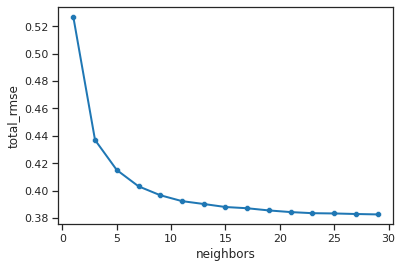

In [8]:
sns.scatterplot(data=knn_grad, x='neighbors', y='total_rmse')
sns.lineplot(data=knn_grad, x='neighbors', y='total_rmse')

In [9]:
opt_n = np.min(knn_grad.neighbors[knn_grad.total_rmse==np.min(knn_grad.total_rmse)])
print('best performance n: %d' %opt_n)
knn_grad[knn_grad.total_rmse==np.min(knn_grad.total_rmse)]

best performance n: 29


,neighbors,kd_dif rmse,str_dif rmse,td_dif rmse,sub_dif rmse,total_rmse
14,29,0.1048,0.0937,0.1071,0.0771,0.3827


### <span style='color:green'> **[done]** </span> Model evaluation:

In [10]:
rmse = 0
for stat in ['kd','str','td','sub']:
    rmse += get_rmse(act=df[stat + '_dif'][df.set=='test'], pred=df[stat + '_dif_pred'][df.set=='test'])
print('Model Accuracy: %f' %(1-rmse))    

Model Accuracy: 0.681000


#### <span style='color:green'> **[done]** </span> Saving data:

In [11]:
param = pd.DataFrame(data={'ml_model':['knn_reg'],
                          'parameter_name':['neighbors'],
                          'value':[opt_n],
                          'accuracy':[1-rmse]}
                    )

param.to_csv('../global_variables/ml_models_parameters.csv')
print('../global_variables/ml_models_parameters.csv saved.')

../global_variables/ml_models_parameters.csv saved.


In [12]:
df.to_csv('../data/fight_stat_data_trained.csv')
print('../data/fight_stat_data_trained.csv saved.')

../data/fight_stat_data_trained.csv saved.


## <span style='color:green'> **[done]** </span> KNN regression model training: